#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.


### You would need to submit your GitHub repository link. Refer to the Section 6: Final Submission on the PDF document for the details.


In [4]:
pip install opencv-python

   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   - -------------------------------------- 1.0/39.5 MB 5.6 MB/s eta 0:00:07
   --- ------------------------------------ 3.1/39.5 MB 7.4 MB/s eta 0:00:05
   ---- ----------------------------------- 4.5/39.5 MB 7.7 MB/s eta 0:00:05
   ------ --------------------------------- 6.6/39.5 MB 7.7 MB/s eta 0:00:05
   -------- ------------------------------- 8.1/39.5 MB 8.1 MB/s eta 0:00:04
   ---------- ----------------------------- 10.2/39.5 MB 8.3 MB/s eta 0:00:04
   ----------- ---------------------------- 11.8/39.5 MB 8.0 MB/s eta 0:00:04
   ------------- -------------------------- 13.6/39.5 MB 8.2 MB/s eta 0:00:04
   --------------- ------------------------ 15.5/39.5 MB 8.2 MB/s eta 0:00:03
   ----------------- ---------------------- 17.0/39.5 MB 8.3 MB/s eta 0:00:03
   ------------------- -------------------- 19.4/39.5 MB 8.4 MB/s eta 0:00:03
   --------------------- ------------------ 21.5/39.5 MB 8.5 MB/s eta 0:00:03


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

import wandb

wandb.login(key="3f319a4277e26345272aa1d9bedc0cc99f103dc7")
wandb.init(project="distance-classification")

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.
wandb: WARNING Unable to render HTML, can't import display from ipython.core
wandb: WARNING Unable to render HTML, can't import display from ipython.core
wandb: WARNING Unable to render HTML, can't import display from ipython.core
wandb: WARNING Unable to render HTML, can't import display from ipython.core
wandb: WARNING Unable to render HTML, can't import display from ipython.core
wandb: WARNING Unable to render HTML, can't import display from ipython.core
wandb: WARNING Unable to render HTML, can't import display from ipython.core
wandb: WARNING Unable to render HTML, can't import display from ipython.core
wandb: WARNING Unable to render HTML, can't import display from ipython.core


In [35]:
# Reading the image plaksha_Faculty.jpg
img1 = cv2.imread('Plaksha_Faculty.jpg')

# Convert the image to grayscale
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

# Loading the required haar-cascade xml classifier file for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Applying the face detection method on the grayscale image.
# You can adjust the scaleFactor, minNeighbors, minSize, and maxSize parameters for better results.
faces_rect = face_cascade.detectMultiScale(img1_gray, scaleFactor=1.05, minNeighbors=4, minSize=(25, 25), maxSize=(50, 50))

# Define the text and font parameters
text = "Face Detected"  # The text you want to write
font = cv2.FONT_HERSHEY_SIMPLEX  # Font type
font_scale = 0.5  # Font scale factor
font_color = (0, 0, 255)  # Text color in BGR format (here, it's red)
font_thickness = 1  # Thickness of the text

# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img1, (x, y), (x + w, y + h), (0, 0, 255), 2)
    # Adding the text to the image
    cv2.putText(img1, text, (x, y - 10), font, font_scale, font_color, font_thickness)

# Display the image with the total number of faces detected in the window title
window_title = f"Total number of faces detected are {len(faces_rect)}"
# wandb.log({"Detected faces image: ", wandb.Image(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))})
cv2.imshow(window_title, img1)
cv2.waitKey(0)
cv2.destroyAllWindows()


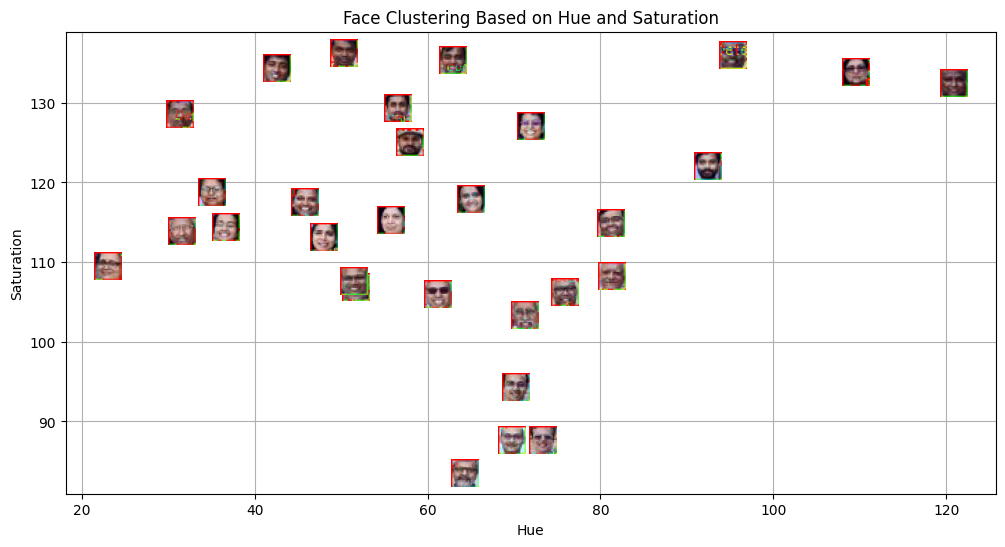

In [36]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# Extract face region features (Hue and Saturation)
img_hsv = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV) ## call the img and convert it from BGR to HSV and store in img_hsv
hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

## Perform k-Means clustering on hue_saturation and store in kmeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(hue_saturation)
#centroids = kmeans.cluster_centers_
#labels = kmeans.labels_

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x,y,w,h ) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])
    
## Put x label
plt.xlabel('Hue')
## Put y label
plt.ylabel('Saturation')
## Put title
plt.title('Face Clustering Based on Hue and Saturation')
## Put grid
plt.grid(True)
wandb.log({"hue sat plot": wandb.Image(plt.gcf())})
## show the plot
plt.show()


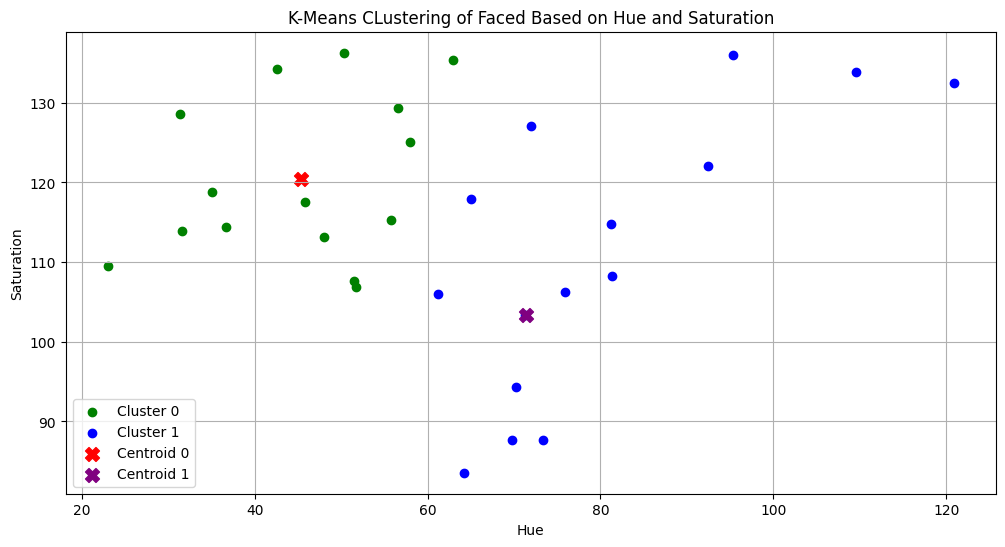

In [37]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color='green', label='Cluster 0')


cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color='blue', label='Cluster 1')

# Calculate and plot centroids
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]

# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(centroid_0[0], centroid_0[1], color='red', marker='X', s=100, label='Centroid 0')
plt.scatter(centroid_1[0], centroid_1[1], color='purple', marker='X', s=100, label='Centroid 1')

## Put x label
plt.xlabel('Hue')
## Put y label
plt.ylabel('Saturation')
## Put title
plt.title('K-Means CLustering of Faced Based on Hue and Saturation')
## Add a legend
plt.legend()
## Add grid
plt.grid(True)
wandb.log({"K Means Plot": wandb.Image(plt.gcf())})
## Show the plot
plt.show()


In [38]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv2.imread('Dr_Shashi_Tharoor.jpg')

# Detect face in the template image after converting it to gray and store it in template_faces
template_gray = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)
template_faces = face_cascade.detectMultiScale(template_gray, scaleFactor=1.1, minNeighbors=5)

# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)

cv2.imshow("Detected Faces in Template Image", template_img)
cv2.waitKey(0)
cv2.destroyAllWindows() 


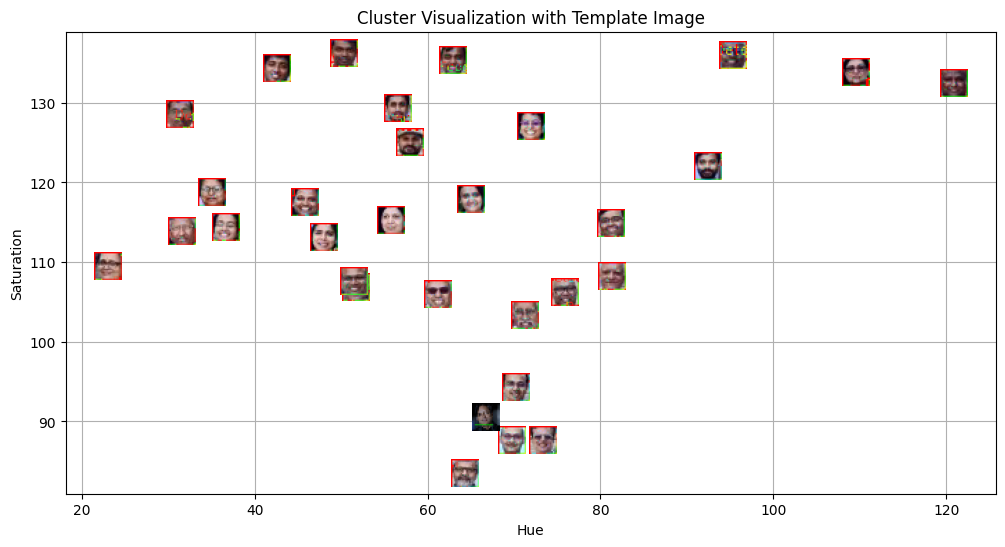

In [39]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image as we did it for detected faces.
template_hue = np.mean(template_hsv[:, :, 0])
template_saturation = np.mean(template_hsv[:, :, 1])

# Predict the cluster label for the template image and store it in template_label
template_label = kmeans.predict([[template_hue, template_saturation]])[0]

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

## Put x label
plt.xlabel('Hue')
## Put y label
plt.ylabel('Saturation')
## Put title
plt.title('Cluster Visualization with Template Image')
## Add grid
plt.grid(True)
wandb.log({"Hue, Sat Plot w Template Img": wandb.Image(plt.gcf())})
## show plot
plt.show()


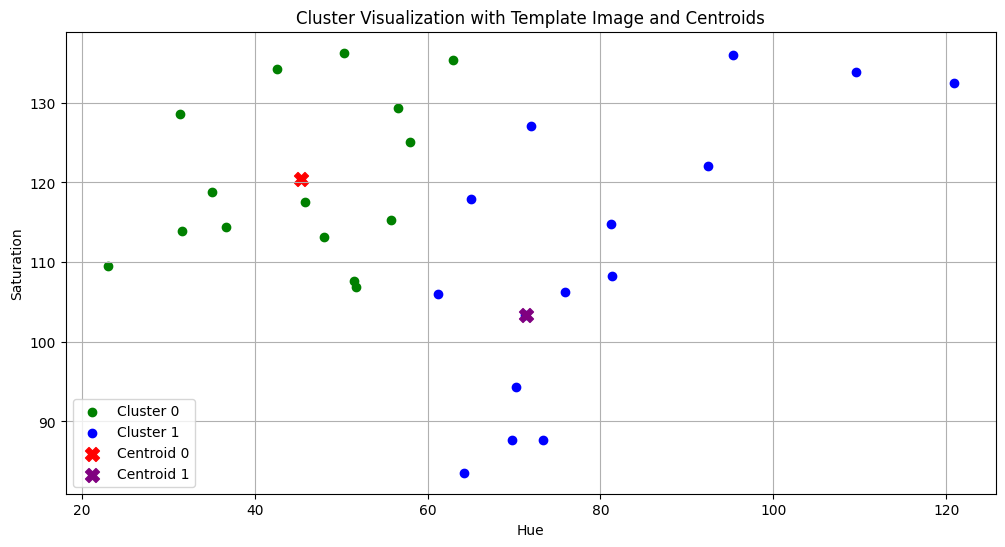

wandb: WARNING Unable to render HTML, can't import display from ipython.core
wandb: WARNING Unable to render HTML, can't import display from ipython.core


In [40]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color='green', label='Cluster 0')

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color='blue', label='Cluster 1')

# Calculate and plot centroids for both the clusters
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]
plt.scatter(centroid_0[0], centroid_0[1], color='red', marker='X', s=100, label='Centroid 0') ## plot for centroid 0
plt.scatter(centroid_1[0], centroid_1[1], color='purple', marker='X', s=100, label='Centroid 1')  ## plot for centroid 1
# plt.plot(template_hue, template_saturation, marker='o', c='violet', markersize=10, label='Class ?')

## Put x label
plt.xlabel('Hue')
## Put y label
plt.ylabel('Saturation')
## Put title
plt.title('Cluster Visualization with Template Image and Centroids')
## Add a legend
plt.legend()
## Add grid
plt.grid(True)
wandb.log({"K Means Plot with Template": wandb.Image(plt.gcf())})
## Show the plot
plt.show()

wandb.finish()

## Report:
## Answer the following questions within your report:


#### 1. What are the common distance metrics used in distance-based classification algorithms? 

1. Euclidean
2. Manhattan
3. Minkowski
4. Chebyshev
5. Cosine
6. Mahalanobis
7. Hamming


#### 2. What are some real-world applications of distance-based classification algorithms? 

1. Medical Diagnosis
2. Recommendation Systems
3. Image recognition
4. Fraud detection
5. Classification (documents, text)

#### 3. Explain various distance metrics. 

1. Euclidean - Measures shortest straight-line distance between two points
2. Manhattan - Measures distance along axes (taxi cab navigation)
3. Minkowski - General form of euclidean and manhattan
4. Chebyshev - Maximum absolute difference in any dimension. (king's movement)
5. Cosine - explain angles between two vectors 
6. Mahalanobis - Features correlations using covariance
7. Hamming - counts elements that differ. 


#### 4. What is the role of cross validation in model performance? 

It helps the model improve the performace by splitting dataset into multiple training and validation subsets. It is to make the model well enough to unseen data and reduce overfitting of data. For example, K-Cross cross-validation, Leave one out cross validation. Also helps finding the optimal K value

#### 5. Explain variance and bias in terms of KNN? 

High bias is related to large number of K. When k is too high, model becomes simple which leads to accuracy and it forms a cluster around everything. It underfits the data and does not find enough patterns. When K is too low, model fits everything into a cluster. Variance is related to underfitting, which in turn is related to low number of K. This mains that the data is modelled onto the trainign set, and does not capture new data well.